# Advent of Code - 2024 - Day 24 - Problem 4

https://adventofcode.com/2024/day/24


## Load Source Data

Load the map data into `DATA`.

In [1]:
f = open("data/day24.txt", "r")
DATA = list(map(str.strip, f.readlines()))
f.close()

## Parse Data



In [2]:
idx_blank_line = DATA.index("")

GATES = {}
OPS = {}

for line in DATA[:idx_blank_line]:
    fields = line.split(": ")
    gate = fields[0]
    value = fields[1]

    GATES[gate] = value

for line in DATA[idx_blank_line + 1 :]:
    fields = line.split(" ")
    input_1 = fields[0]
    op = fields[1]
    input_2 = fields[2]
    output = fields[4]

    if input_1 not in GATES:
        GATES[input_1] = None
    if input_2 not in GATES:
        GATES[input_2] = None
    if output not in GATES:
        GATES[output] = None

    OPS[output] = (input_1, op, input_2)

## Create Dependency Graph

Creates a DAG where the edges point from source gates to target gates.

Example: Assume the following rule:

```
bfw XOR mjb -> z00
```

The `OPS` dictionary contains:

```
OPS['z00'] = ('bfw', 'XOR', 'mjb')
```

We will add the following edges to the DAG:

```
bfw --> z00
mjb --> z00
```

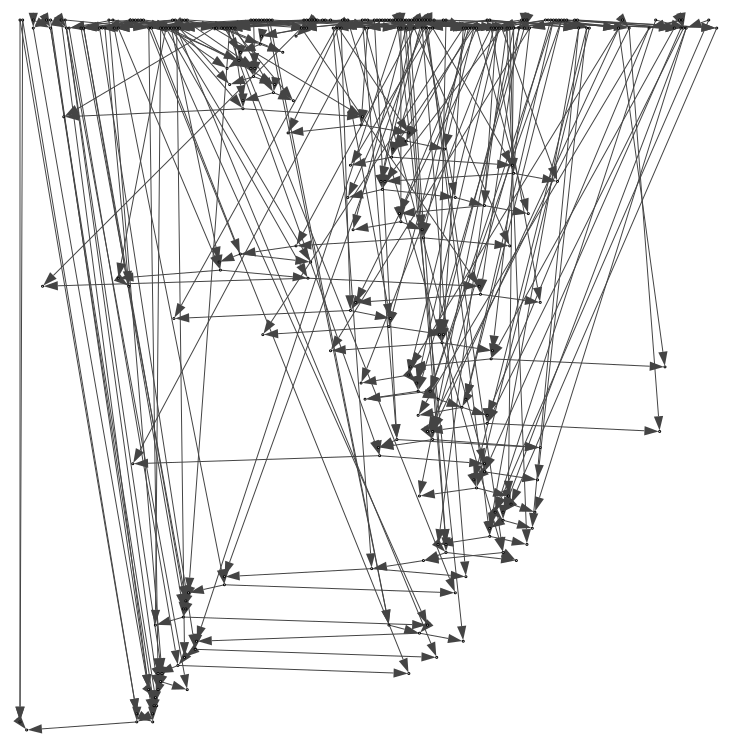

In [3]:
import igraph as ig

edges = [(OPS[key][0], key) for key in OPS]
edges.extend([(OPS[key][2], key) for key in OPS])
DAG = ig.Graph.TupleList(edges, directed=True)

ig.plot(
    DAG,
    layout="sugiyama",
    vertex_size=2,
    vertex_color="white",
    bbox=(750, 750),
)

## Compute Result

In [4]:
def get_value(gate_name):
    value = GATES[gate_name]
    if value == None:
        value = evaluate(OPS[gate_name])
        GATES[gate_name] = value
    return value


def evaluate(expression):
    lhs, op, rhs = expression
    lhs_value = get_value(lhs)
    rhs_value = get_value(rhs)
    if op == "AND":
        return "1" if lhs_value == "1" and rhs_value == "1" else "0"
    if op == "OR":
        return "1" if lhs_value == "1" or rhs_value == "1" else "0"
    if op == "XOR":
        return "1" if lhs_value != rhs_value else "0"
    raise Exception(f"Unknown op {op}")

for gate_name in [g for g in GATES.keys() if g.startswith("z")]:
    GATES[gate_name] = None

result = 0
sorted_gate_names = sorted(GATES.keys(), reverse=True)
for gate_name in [g for g in sorted_gate_names if g.startswith("z")]:
    value = get_value(gate_name)
    result *= 2
    if value == "1": result += 1

print(f"result = {result}")

result = 53325321422566
